In [1]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [2]:
def get_tf(corpus):
    tf_dict = []
    for doc in corpus:
        doc_count = {}
        doc_len = len(doc)
        for word in doc:
            doc_count[word] = doc_count.get(word, 0) + 1
        tf_dict.append([i/doc_len for i in doc_count.values()])
    return tf_dict

In [3]:
def get_idf(words_set, corpus):
    docs_count = len(corpus)
    words_dict = {}
    idf = {}
    for word in words_set:
        for doc in corpus:
            if word in doc:
                words_dict[word] = words_dict.get(word, 0) + 1
    for word in words_dict.keys():
        idf[word] = log(docs_count/words_dict[word])
    return idf, words_dict

In [4]:
def get_tfidf(idf, tf, corpus, words_dict):
    tfidf = []
    avg_tfidf = {}
    for i in range(len(corpus)-1):
        doc_tfidf = []
        doc = corpus[i]
        tf_doc = tf[i]
        for j in range(len(doc)-1):
            doc_tfidf.append(tf_doc[j]*idf[doc[j]])
            avg_tfidf[doc[j]] = avg_tfidf.get(doc[j], 0) + (tf_doc[j]*idf[doc[j]])
        tfidf.append(doc_tfidf)
    for word, tfidf in avg_tfidf.items():
        avg_tfidf[word] = avg_tfidf[word]/words_dict[word]
    return avg_tfidf

In [5]:
finance = pd.read_csv('Finance.csv')

print(finance.shape)
n_docs = finance.shape[0]

(109, 1)


In [6]:
finance.head()

,Keyskills
0,"Credit Underwriting, management, mortgage, mor..."
1,"Financial Modelling, modeling, private equity,..."
2,"finance, sales, back office, customer care, re..."
3,"php, management, compliance, legal compliance,..."
4,"Due diligence, Forecasting, PTP, Analytics, OT..."


In [7]:
corpus = []
for i in range(n_docs):
    corpus.append(list(finance.iloc[i])[0].split(','))
# print(corpus)

words_set = set()
for doc in corpus:
    words = doc
    words_set = words_set.union(set(words))
n_words_set = len(words_set)   #·Number of unique words in the 
print(n_words_set)

386


In [28]:
tf = get_tf(corpus)
idf, words_dict = get_idf(words_set, corpus)
# print(corpus[-1], tf[-1])

tfidf = get_tfidf(idf, tf, corpus, words_dict)

sorted_idf = sorted(idf.items(), key=lambda x: x[1])
# print(*sorted_idf[1:11], sep="\n")
top_words = dict(sorted_idf)
print(sorted_idf)

[('management', 1.3955110162248148), ('finance', 1.555853666299994), ('financial analysis', 2.052290552613885), ('accounting', 2.052290552613885), ('receivable', 2.388762789235098), ('sap', 2.4941233048929243), ('Forecasting', 2.4941233048929243), ('analysis', 2.4941233048929243), ('balance', 2.4941233048929243), ('reporting', 2.6119063405493077), ('auditing', 2.6119063405493077), ('budgeting', 2.7454377331738304), ('reconciliation', 2.7454377331738304), ('financial management', 2.7454377331738304), ('financial statements', 2.899588413001089), ('financial planning', 2.899588413001089), ('Budgeting', 2.899588413001089), ('variance analysis', 2.899588413001089), ('TDS', 3.0819099697950434), ('payables', 3.0819099697950434), ('senior', 3.0819099697950434), ('Accounts Receivable', 3.0819099697950434), ('excel', 3.0819099697950434), ('Accounting', 3.0819099697950434), ('tds', 3.0819099697950434), ('taxation', 3.0819099697950434), ('financial planning and analysis', 3.305053521109253), ('pla

In [36]:
wordcloud_tfidf = {}
for i, j in top_words.items():
    wordcloud_tfidf[i] = 5 - j
wordcloud_tfidf

{'management': 3.6044889837751852,
 'finance': 3.4441463337000062,
 'financial analysis': 2.947709447386115,
 'accounting': 2.947709447386115,
 'receivable': 2.611237210764902,
 'sap': 2.5058766951070757,
 'Forecasting': 2.5058766951070757,
 'analysis': 2.5058766951070757,
 'balance': 2.5058766951070757,
 'reporting': 2.3880936594506923,
 'auditing': 2.3880936594506923,
 'budgeting': 2.2545622668261696,
 'reconciliation': 2.2545622668261696,
 'financial management': 2.2545622668261696,
 'financial statements': 2.100411586998911,
 'financial planning': 2.100411586998911,
 'Budgeting': 2.100411586998911,
 'variance analysis': 2.100411586998911,
 'TDS': 1.9180900302049566,
 'payables': 1.9180900302049566,
 'senior': 1.9180900302049566,
 'Accounts Receivable': 1.9180900302049566,
 'excel': 1.9180900302049566,
 'Accounting': 1.9180900302049566,
 'tds': 1.9180900302049566,
 'taxation': 1.9180900302049566,
 'financial planning and analysis': 1.694946478890747,
 'planning': 1.694946478890747,


In [38]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wordcloud_tfidf)

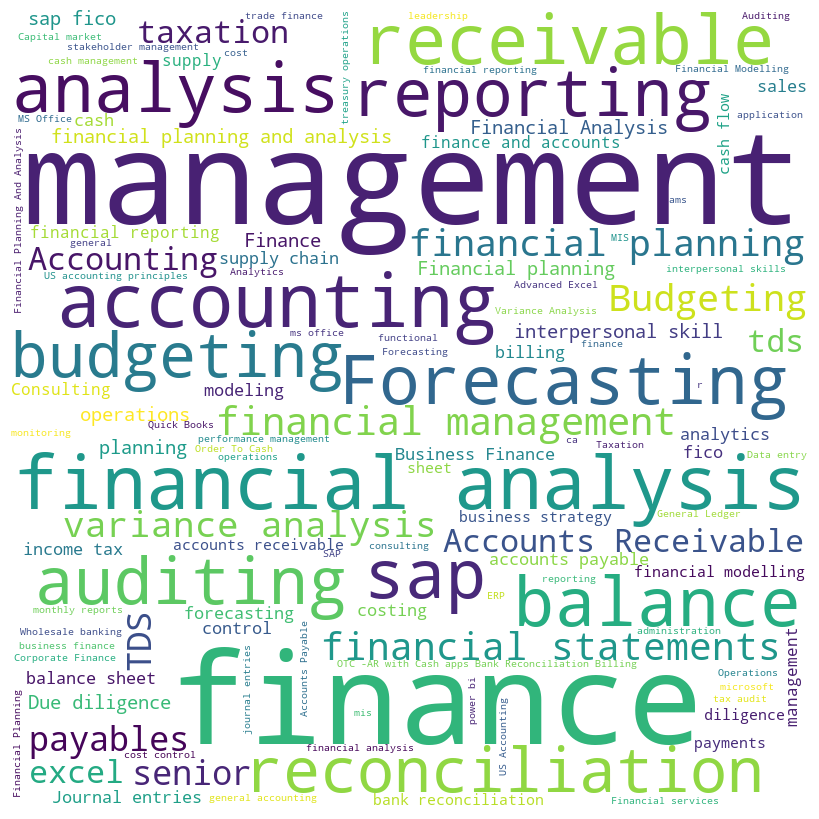

In [39]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()